<a href="https://colab.research.google.com/github/Alice049/ml/blob/main/LR%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
class LinearRegressionGD(object):
  def __init__(self, eta=0.001, n_iter=20):
    self.eta=eta
    self.n_iter=n_iter
  def fit(self,X,y):
    self.w_=np.random.randn(1+X.shape[1])
    self.cost_=[]
    for i in range(self.n_iter):
      output=self.lin_comb(X)
      errors=(y-output)
      self.w_[1:]+=self.eta*X.T.dot(errors)
      self.w_[0]+=self.eta*errors.sum()
      cost=(errors**2).sum()/2.0
      self.cost_.append(cost)
    return self
  def lin_comb(self,X):
    return np.dot(X,self.w_[1:])+self.w_[0]
  def predict(self,X):
    return self.lin_comb(X)


In [61]:
print([name for name in dir() if name in ["LinearRegressionGD"]])


['LinearRegressionGD']


In [62]:
X=np.linspace(0,5,50)
print(X[:4])

[0.         0.10204082 0.20408163 0.30612245]


In [63]:
y=7.7*X+55+np.random.randn(50)
print(y[:4])

[55.25393888 57.24466375 55.92733705 57.02812829]


In [64]:
lr=LinearRegressionGD(n_iter=350)
#lr.fit(X.reshape(-1,1),y)

In [65]:
for tmp in["w","cost_"]:
  print(tmp in dir(lr))

False
False


In [66]:
print(lr.n_iter)

350


In [67]:
#lr=LinearRegressionGD(n_iter=350)
lr.fit(X.reshape(-1,1), y)
for tmp in ["w_","cost_"]:
  print(tmp in dir(lr))

True
True


In [68]:
print(lr.w_)

[54.07601406  7.94107826]


In [69]:
print(lr.cost_[-3:])

[31.19431479545334, 31.099940660482734, 31.00778199950181]


In [70]:
X_new=np.array([2])
print(lr.predict(X_new))

69.95817056744416


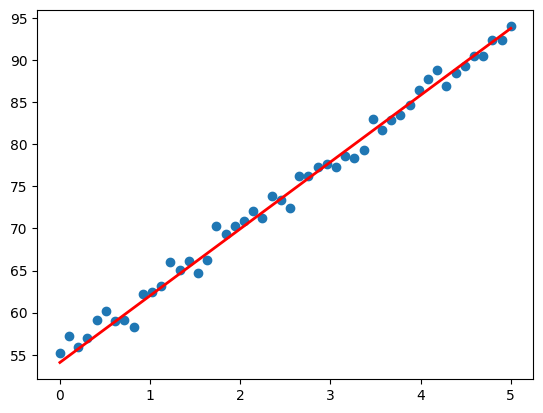

In [71]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(X,y)
ax.plot(X,lr.predict(X.reshape(-1,1)),color='red',linewidth=2)